# Features importances de la classe des Tués du modèle HistGradientBoosting

### Imports

In [1]:
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
pd.set_option('display.max_columns', None)
## Import des scripts python
import sys
import os
sys.path.append(os.path.abspath('../../python_scripts/'))

#import load_datas
import train_model as train
import save_model as saveModel
#import pickle_model

# Rechargement en cas de modification
import importlib
#importlib.reload(train)
#importlib.reload(saveModel)
#importlib.reload(pickle_model)

### Chargement des shap values de la classe 3 (Tué)

/home/flakai/Documents/MAR24_CDS_Accidents/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


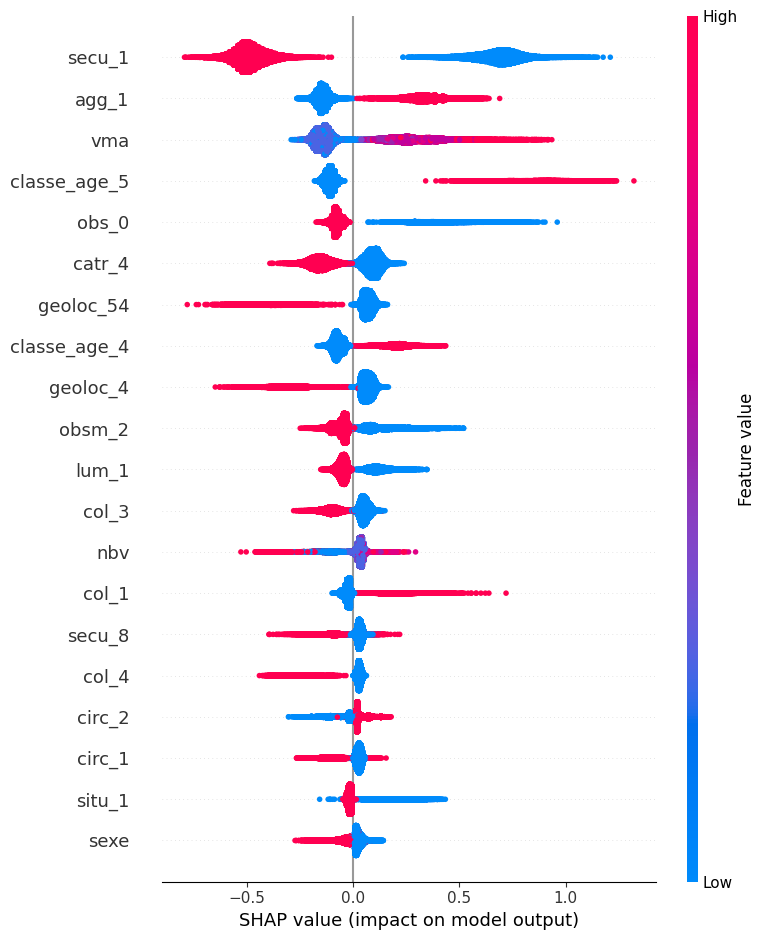

In [2]:
import shap

shap_df= pd.read_csv("shape_value_files/1_final_HistGradientBoosting_values_data_classe_3_geo.zip", \
                      compression=dict(method='zip', archive_name='1_final_HistGradientBoosting_values_data_classe_3_geo.csv'))

X_test = pd.read_csv("../../../../Data/X_test.zip", compression=dict(method='zip', archive_name='X_test.csv'))

shap_df= shap_df.drop(columns=['x_test_instance','base_values'])

shap_values_csv = shap_df.values

feature_names = shap_df.columns

shap_exp = shap.Explanation(values=shap_values_csv, data=X_test, feature_names=feature_names)

shap.summary_plot(shap_exp)


**Remarques :**

Les caractéristiques les plus importantes, par ordre d'importance, sont :
* **secu_1 (ceinture de sécurité)**
   > Selon le modèle, le risque de se faire tuer est plus important sans ceinture de sécurité.
* **agg_1 (Hors agglomération)**
   > Selon le modèle, le risque de se faire tuer est plus important en Hors agglomération.
* **vma (vitesse maximales autorisée)**
  > Selon le modèle, plus la vitesse maximale autorisée est élevée, plus la probabilité d'être tué est importante.
* **classe_age_5 ( plus de 65 ans)**
  > Selon le modèle, les personnes de plus de 65 ans ont plus de chances de se faire tuer.
* **obs_0 (Obtacle fixe hurté - sans objet)** 
  > Le modèle predit que si le l'obstacle fixe hurté est sans objet alors la probilité d'être tué est faible

* **catr_4 (voie communales)** 
  > Selon le modèle, le risque d'être tué sur une voie communale est faible.
* **geoloc_54 (Géolocalisation 54)** 
  > Le modèle predit que si la géolocalisation n'est pas 54 alors le rique d'être tué est impotant

### Groupement des variables catégorielles

In [3]:
# Creer un dataframe avec les valeurs absolue des shap values
df_shap=pd.DataFrame(np.abs(shap_values_csv), columns=X_test.columns)

column_groups = {}

# Regroupement des colonnes
for col in X_test.columns:
    prefix = col.split('_')[0]  
    if prefix not in column_groups:
        column_groups[prefix] = []
    column_groups[prefix].append(col)

df_avg = pd.DataFrame()

# Calculer les moyennes pour chaque groupe de variable
for prefix, columns in column_groups.items():
    df_avg[f'{prefix}'] = df_shap[columns].mean(axis=1) 

# Afficher le DataFrame des moyennes des observations
display(df_avg.head(3))


,mois,lum,agg,int,atm,col,catr,circ,vosp,prof,plan,surf,infra,situ,catv,obs,obsm,choc,manv,motor,place,catu,trajet,hh,classe,geoloc,nbv,vma,sexe,secu,weekend
0,0.001556,0.014123,0.057362,0.006133,0.001191,0.021076,0.018193,0.035594,0.003877,0.002041,0.002523,0.000796,0.000678,0.003504,0.008152,0.006323,0.013066,0.012439,0.001134,0.009272,0.000764,0.000876,0.004692,0.002011,0.048558,0.003717,0.141372,0.115386,0.025344,0.082524,0.017597
1,0.001448,0.008375,0.309209,0.004122,0.000880,0.048713,0.022041,0.030249,0.000944,0.007928,0.015580,0.000194,0.000244,0.002745,0.001657,0.003131,0.008699,0.008206,0.024001,0.002494,0.001224,0.007140,0.008009,0.001815,0.042227,0.003046,0.050079,0.421771,0.019278,0.047761,0.022205
2,0.004301,0.051156,0.079830,0.005706,0.001446,0.032348,0.020206,0.016539,0.002866,0.005553,0.003157,0.000664,0.001205,0.003943,0.001742,0.006119,0.011150,0.006277,0.002048,0.001207,0.001595,0.003926,0.015831,0.005634,0.037091,0.002713,0.291995,0.214585,0.021434,0.076106,0.001908


### Global Feauture Importance

,vma,agg,secu,classe,nbv,sexe,col,lum,circ,obsm,catr,weekend,choc,obs,situ,trajet,catu,int,plan,manv,geoloc,prof,hh,catv,motor,mois,place,atm,infra,vosp,surf
0,0.196432,0.115141,0.07145,0.057929,0.051472,0.033239,0.030499,0.023475,0.022174,0.018783,0.018335,0.014922,0.01147,0.009492,0.007988,0.00591,0.005072,0.004964,0.004432,0.004247,0.003857,0.003712,0.003224,0.002793,0.002553,0.00253,0.002221,0.002086,0.001915,0.001366,0.000771


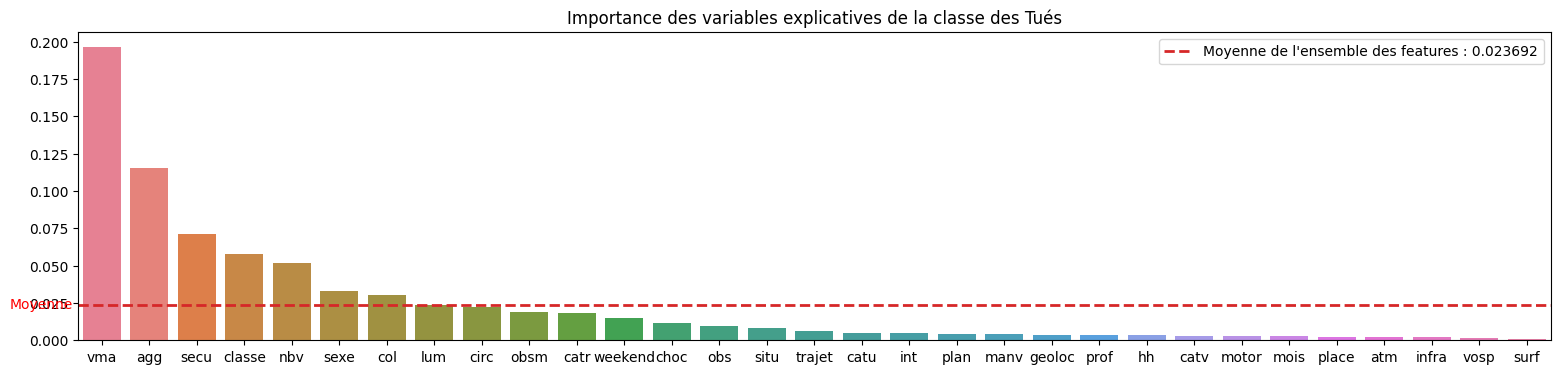

In [4]:

### Moyenne des shap values par variable
df_final_var_mean=pd.DataFrame(df_avg.mean().sort_values(ascending=False)).T

display(df_final_var_mean)

plt.figure(figsize=(19, 4))

# Bar plot de l'importance des variables explicatives
sns.barplot(df_final_var_mean)

# La moyenne total des features
cat_moy=df_avg.mean().mean()
plt.axhline(y=cat_moy, color=plt.cm.tab10(3), linestyle='--', linewidth=2, label=f"Moyenne de l'ensemble des features : {cat_moy:.6f}")
plt.text(-0.6, cat_moy, "Moyenne", color='r', va='center', ha='right')


plt.legend()
plt.title("Importance des variables explicatives de la classe des Tués")
plt.show()

**Remarques:**
>* Les caractéristiques au-dessus de la moyenne, par ordre d'importance, sont les suivantes : **vma,agg,secu,classe_age,nbv,sexe,col,lum**
>* La vitesse est la caractéristique la plus importante, qui domine
>* Enfin, les variables explicatives les plus importantes correspondent presque toutes aux campagnes de sensibilisation routière, à savoir la vitesse, les équipements de sécurité, l'âge, etc.

### Fonction d'importance d'une variable

In [5]:

def feature_summary_plot(var_name:str):

    mois_columns_with_index = [(index, col) for index, col in enumerate(shap_df.columns) if col.startswith(var_name)]
    
    index_min=min(mois_columns_with_index)[0]
    index_max=max(mois_columns_with_index)[0]
    
    shap.summary_plot(shap_values_csv[:,index_min:index_max+1], X_test.iloc[:, index_min:index_max+1])



### Fonction Summary Plot des variables d'une variable catégorielle

In [6]:

df_shap_var_cat = pd.DataFrame(df_shap.mean().sort_values(ascending=False)).T

def show_categoriel_bar_plot(col_name:str,plot_size=(5,5)):
    #print(f"***** Annalyse des shap values de la variables {col_name} *****")
    for prefix, columns in column_groups.items():
        if prefix==col_name: 
            var_plot = list()
            for c in df_shap_var_cat.columns:                
                if c.startswith(prefix):
                    var_plot.append(c)


            #Plot
            plt.figure(figsize=plot_size)
            ax=sns.barplot(df_shap_var_cat[var_plot])

            #Ligne de la moyenne
            cat_moy=df_shap_var_cat[var_plot].mean().mean()
            #plt.axhline(y=cat_moy, color=plt.cm.tab10(3), linestyle='--', linewidth=2, label='Moyenne')
            plt.axhline(y=cat_moy, color=plt.cm.tab10(3), linestyle='--', linewidth=2, label=f"Moyenne : {cat_moy:.6f}")
            plt.text(-0.6, cat_moy, "Moyenne", color='r', va='center', ha='right')

            #Titre
            plt.title(f"Bar plot shap value de la variable {col_name}")

            plt.legend()
            plt.show()


## Annalyse détaillé des features les plus imporatantes : vma,agg,secu,classe_age,nbv,sexe,col,lum

### Importance la feature **vma** (Vistesse maximale autorisée)

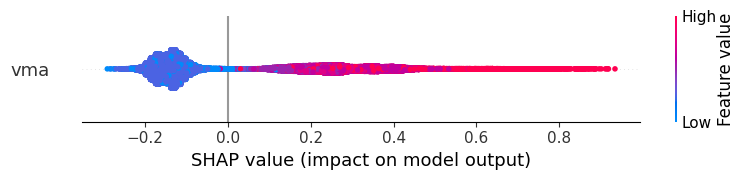

In [7]:
feature_summary_plot("vma")

**Remarques:**
>* vma est la caractéristique la plus importante de notre modèle.
>* Plus la vitesse maximale autorisée est grande, plus le risque d'être tué est élevé


### Importance de la feature **agg** (Agglomération)

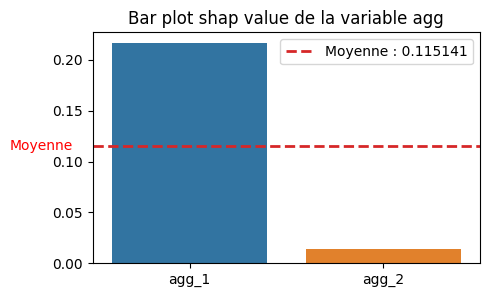

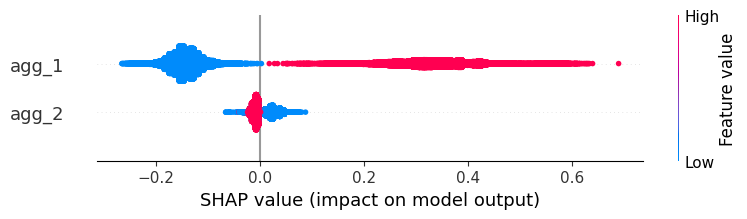

In [8]:
show_categoriel_bar_plot('agg',plot_size=(5,3))
feature_summary_plot("agg")


**Remarques:**
>* agg_1 = Hors agglomération et agg_2 = En agglomération
>* Selon le modèle, plus on est hors agglomération, plus le risque d'être tué est élevé

### Importance de la feature **secu** (Présence et utlisation d'un équipement de sécurité)

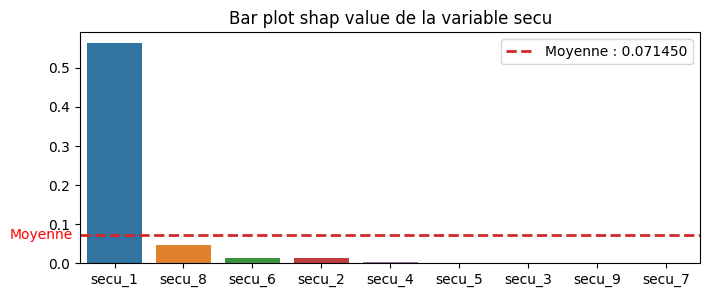

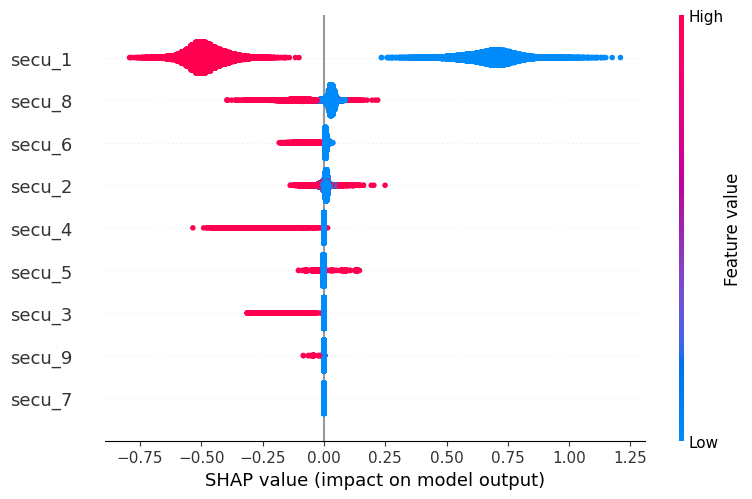

In [9]:
show_categoriel_bar_plot('secu',plot_size=(8,3))
feature_summary_plot("secu")

**Remarques:**
>* La présence du port de la ceinture de sécurité (secu_1) est la variable la plus dominante de la feature
>* Selon le modèle, l'absence du port de la ceinture augmente le risque d'être tué.

### Importance de la feature **classe_age** (Les classes d'age)
Les classes d'âges:
>* **classe_age_0 : 0-9 ans**
>* **classe_age_1 : 10-17 ans**
>* **classe_age_2 : 18-24 ans**
>* **classe_age_3 : 25-44 ans**
>* **classe_age_4 : 45-65 ans**
>* **classe_age_5 : +65 ans**

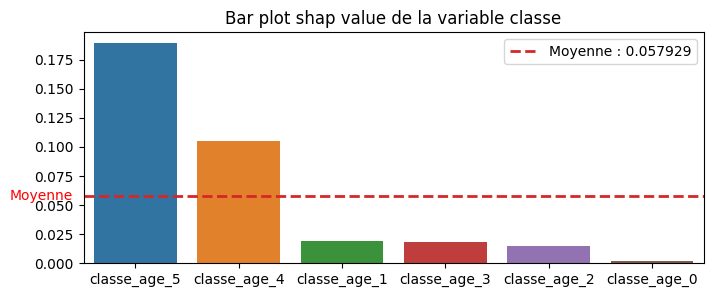

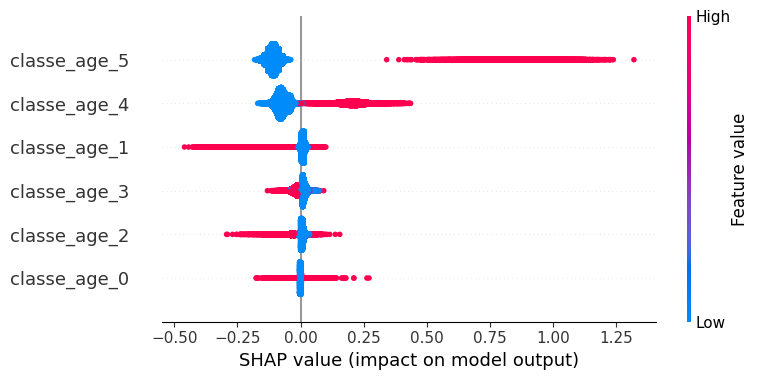

In [10]:
show_categoriel_bar_plot('classe',plot_size=(8,3))
feature_summary_plot("classe")


**Remarques:**
>* Les catégories 5 (+65 ans) et 4 (45-64 ans) sont dominantes dans la feature
>* Selon le modèle, les 45-65 ans et les +65 ans sont plus à risque de se faire tuer


### Importance de la feature **nbv** (Nombre de voie)

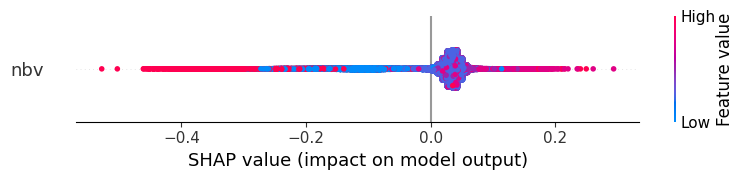

In [11]:
feature_summary_plot("nbv")

***Remarques:***
>* Selon le modèle, plus le nombre de voies diminue, plus le risque de se faire tuer augmente.

### Importance de la feature **circ** (Régime de circulation)

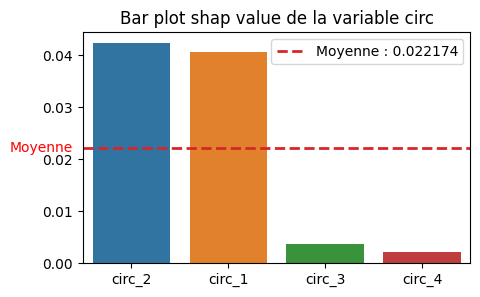

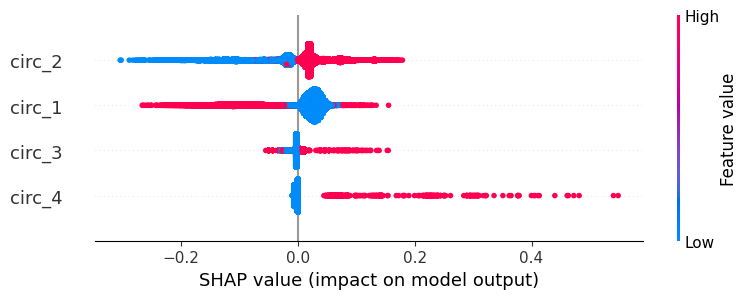

In [12]:
show_categoriel_bar_plot('circ',plot_size=(5,3))
feature_summary_plot("circ")

**Remarques:**
>* La catégorie circ_1 (sens unique) est la plus dominante dans la caractéristique
>* Selon le modèle, la présence du sens de circulation bidirectionnel prédit plus de décès, contrairement au sens unique (circ_1)

### Importance de la feature **Sexe**

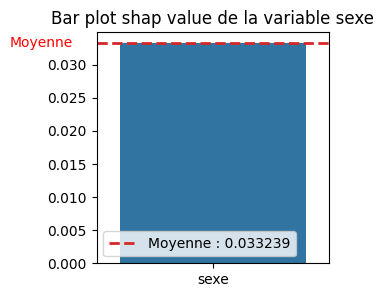

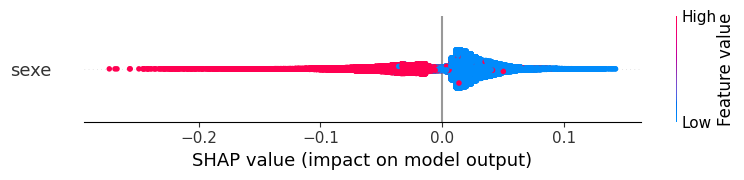

In [13]:
show_categoriel_bar_plot('sexe',plot_size=(3,3))
feature_summary_plot("sexe")

**Remarques:**
>* Le modèle prédit que les hommes ont les plus risqués à être tué

### Importance de la feature **col** (Type de colision)

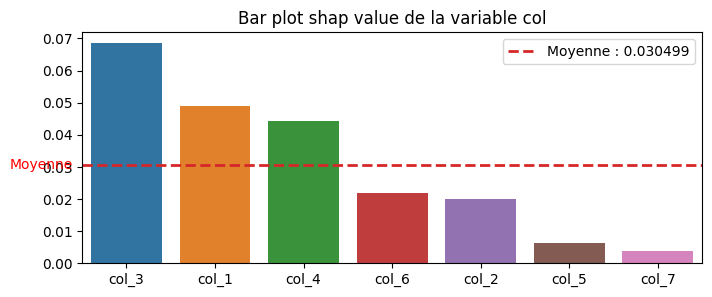

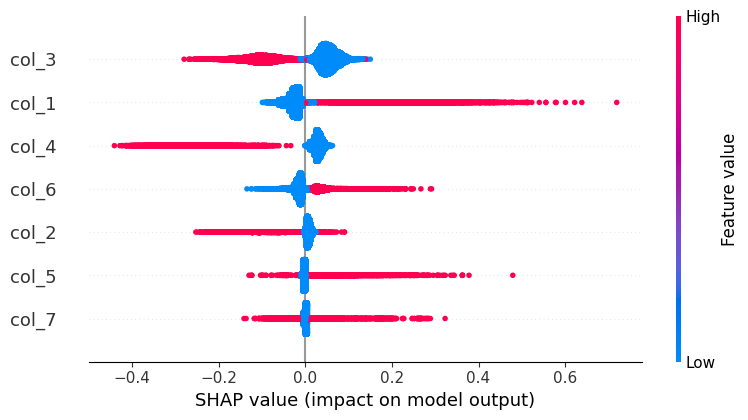

In [14]:
show_categoriel_bar_plot('col',plot_size=(8,3))
feature_summary_plot("col")

**Remarques:**
>* Selon le modèle, le risque de survie est plus élevé si la collision est de type deux véhicules par le côté (col_3).
>* Les collisions de type frontale (col_1) entraînent uniquement des décès


### Importance de la feature **lum** (Lumière)

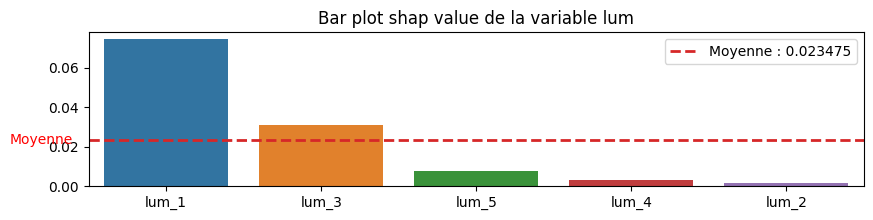

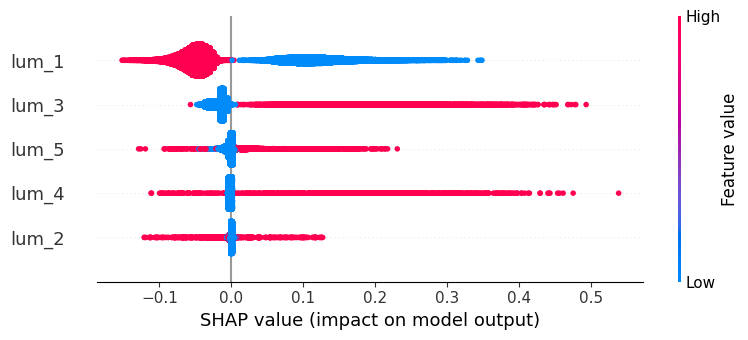

In [15]:
show_categoriel_bar_plot('lum',plot_size=(10,2))
feature_summary_plot("lum")

**Remarques:**
>* La catégorie lum_1 (Plein Jour) domine complètement les autres
>* Le modèle prédit qu'un accident en plein jour à moins de rique de faire des tués contrairement en pleine nuit sans éclairage plublic (lum_3)